# Enter Local Address:
#### The Spotify_API notebook will export the json file(s) to the address 

#### The Spotify_playlist_analysis notebook will import these json file(s) and perform the analysis

In [2]:
local_address = input('Enter local adress: ')

Enter local adress:  C:\Users\anhqu\OneDrive\Desktop\QAs\QA github folder\


# Note: 
#### If you already have the playlist json file(s), skip to the Spotify_playlist_analysis script

# Enter Spotify API Credentials

In [ ]:
user_spotify_name = input('Enter spotify name: ')
user_spotify_id = input('Enter spotify id: ')
client_id = input('Enter your client ID number: ')
client_secret = input('Enter your client secret number: ')
scope = input('Enter scope: ')

# Run the Spotify_API notebook

## Note: 
- User can create multiple json file(s)
- The playlist should have less than 100 tracks due to Spotify API limit. If the original playlist has >100 tracks, split it into smaller playlists
- This step takes a long time

In [ ]:
stop_creating_json = ''

while stop_creating_json !='y':
    %run ./Spotify_API.ipynb
    stop_creating_json = input('Enter y to stop creating more json file. Otherwise enter anything: ')
    print('\n')

# Run the Spotify_Playlist_Analysis notebook

###### Note: User can import multiple json file(s) to the track pool

Enter file name without .json:  anhquocduong611_ASOT_Trance_1_playlist_data




Number of track imported from playlist: 98


Enter y to stop importing. Otherwise enter anything:  y




Total Number of Track in Track pool: 98
Green line is average line
Red line is median line
<module 'matplotlib.pyplot' from 'C:\\Users\\anhqu\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


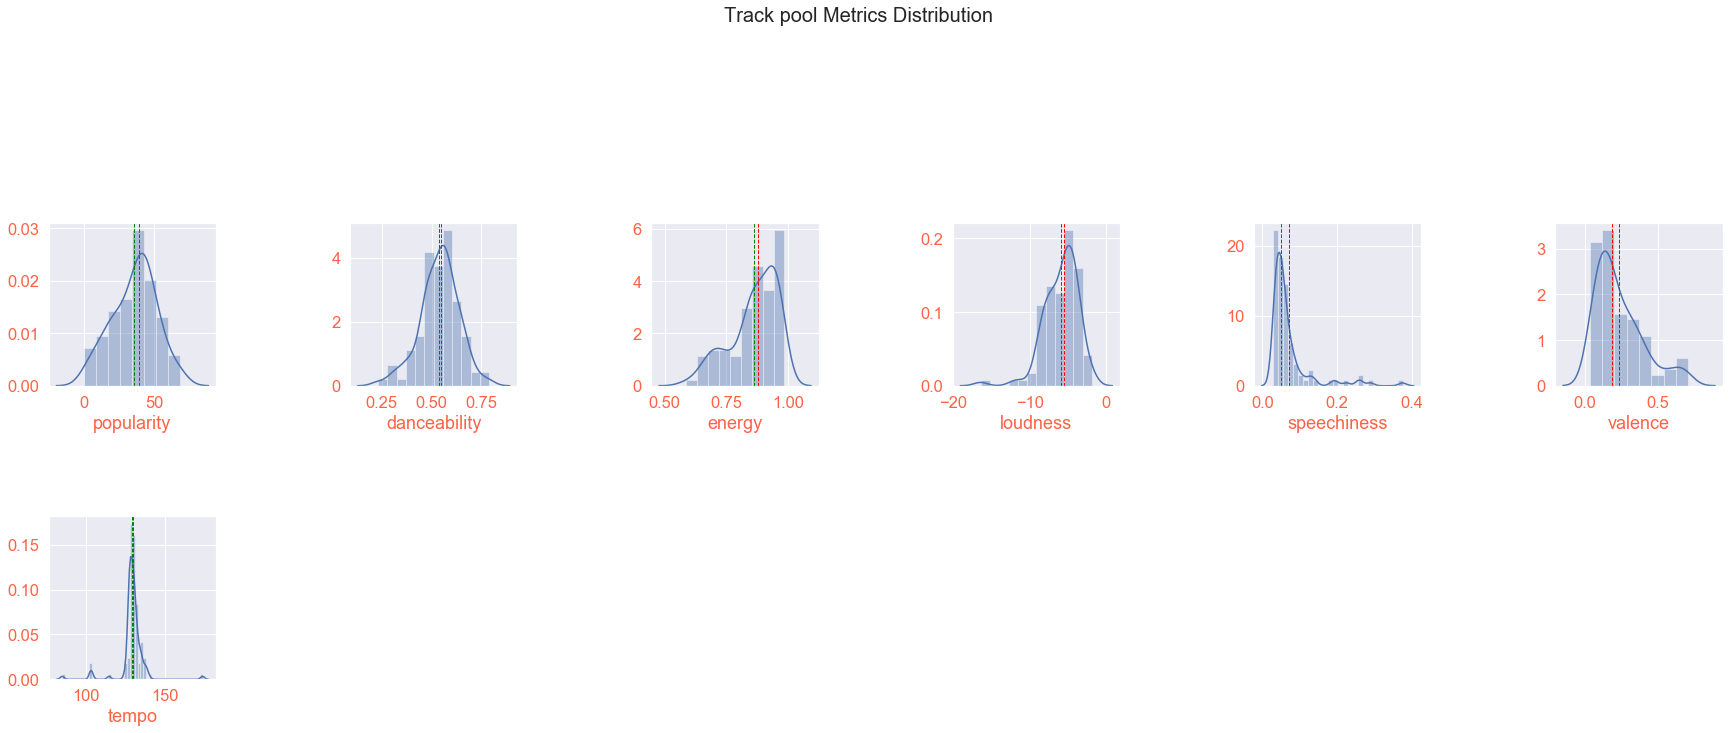

<module 'matplotlib.pyplot' from 'C:\\Users\\anhqu\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


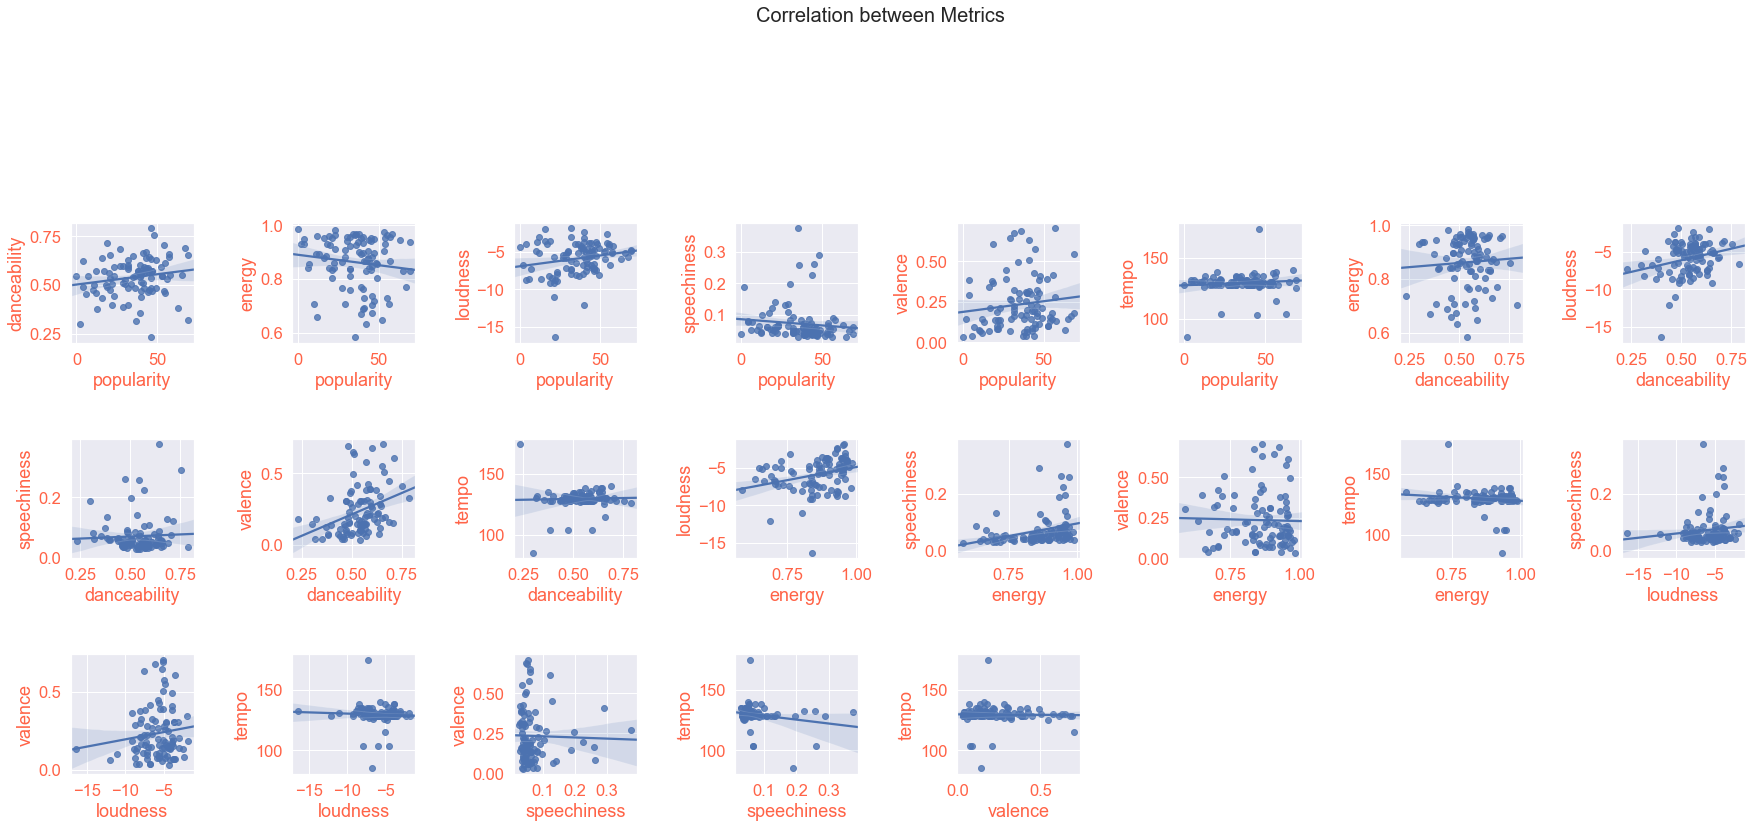

Enter set time:  90


[[0, 'A State Of Trance [ASOT 610] - Outro'], [1, 'Call To Arms - Cosmic Gate Remix'], [2, "Exploration Of Space (ASOT 758) - Cosmic Gate's Third Contact Remix"], [3, 'Past All Regrets (ASOT 794) [Tune Of The Week]'], [4, 'United'], [5, 'My Reflection'], [6, 'We Are Here To Make Some Noise'], [7, 'Particle Arts'], [8, 'Will We Remain? - Spencer Brown Remix'], [9, 'Living On The Edge'], [10, 'Intense'], [11, 'Mirage'], [12, 'Off The Hook'], [13, 'Alone'], [14, 'Another You'], [15, 'Drowning - Avicii Remix'], [16, 'Blah Blah Blah'], [17, 'Be In The Moment (ASOT 850 Anthem)'], [18, 'Saving Light'], [19, 'Great Spirit'], [20, 'Ping Pong'], [21, 'Iconic'], [22, 'Caesarea'], [23, 'Ends Of Time'], [24, 'If Not Now - Club Mix'], [25, 'The Spirit Of The Warrior - Davey Asprey Remix'], [26, 'In The Dark'], [27, 'Let Me Know'], [28, 'Zoom'], [29, 'Oracle'], [30, 'You Are'], [31, 'Heading Up High - First State Remix'], [32, 'Chakra'], [33, 'Xplode - Graham Bell & Yoel Lewis Remix'], [34, 'This Is 

Enter first track:  97


Playlist total length: 
('6:11:34', 371.57)
Previous track: La Résistance De L'Amour
Next track: Violet (Mix Cut)
Similarity score: 3.39
Next track index: 37


Previous track: Violet (Mix Cut)
Next track: Black Eagle - Radio Edit
Similarity score: 3.71
Next track index: 44


Previous track: Black Eagle - Radio Edit
Next track: Living On The Edge
Similarity score: 5.01
Next track index: 9


Previous track: Living On The Edge
Next track: A State Of Trance [ASOT 610] - Outro
Similarity score: 2.94
Next track index: 0


Previous track: A State Of Trance [ASOT 610] - Outro
Next track: Free Tibet - Vini Vici Remix
Similarity score: 1.84
Next track index: 40


Previous track: Free Tibet - Vini Vici Remix
Next track: Caesarea
Similarity score: 25.5
Next track index: 22


Previous track: Caesarea
Next track: There Is Light
Similarity score: 32.9
Next track index: 46


Previous track: There Is Light
Next track: In The Dark
Similarity score: 11.1
Next track index: 26


Previous track: In The Dark

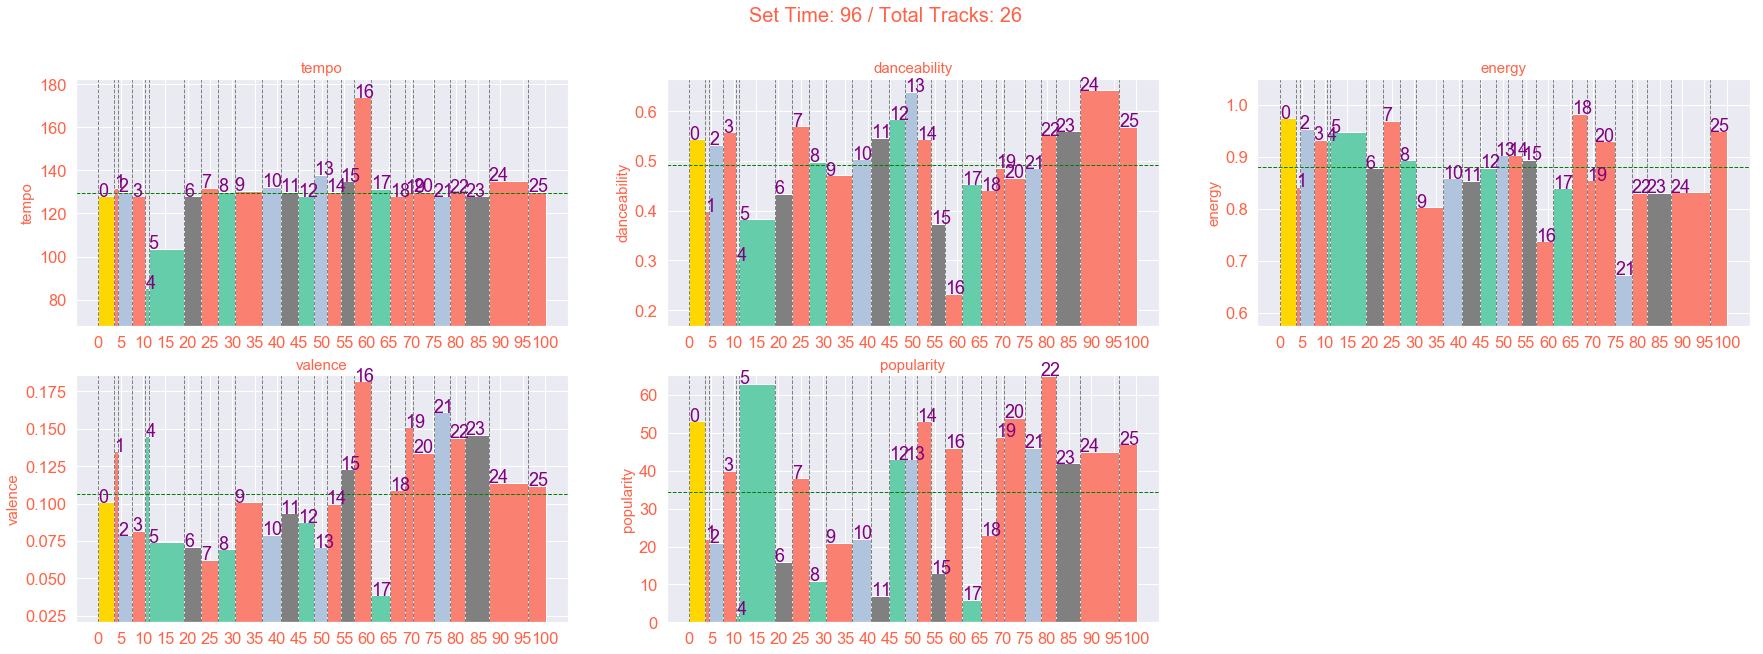

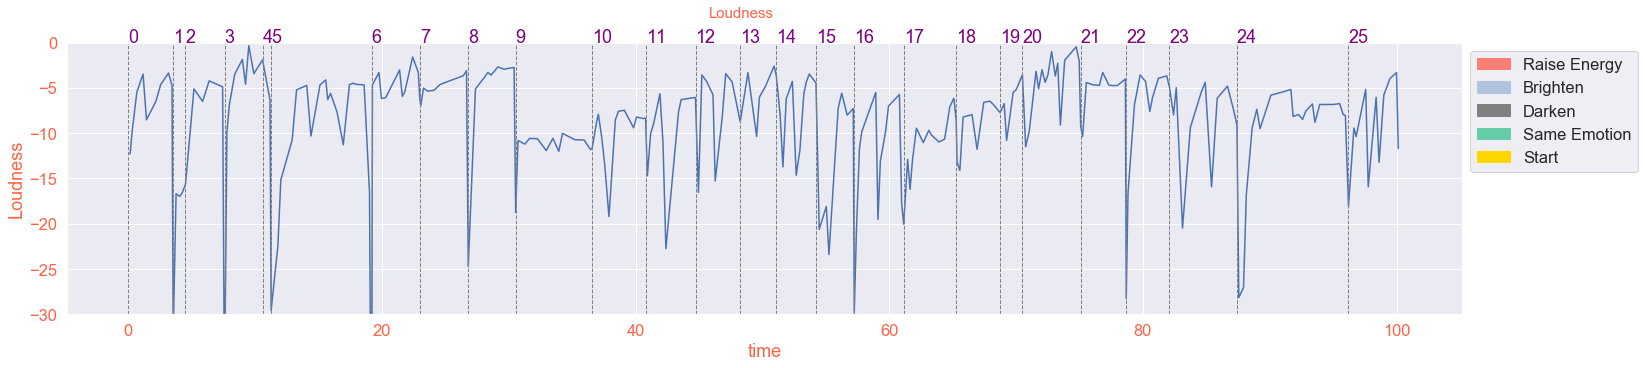

In [30]:
%run ./Spotify_playlist_analysis.ipynb

# Create a Spotify Playlist

In [31]:
import spotipy
import spotipy.util as util

### Because of the scope change, user needs to re-enter API credentials
##### Note: enter scope as playlist-modify-public 

In [32]:
user_spotify_name = input('Enter spotify name: ')
user_spotify_id = input('Enter spotify id: ')
client_id = input('Enter your client ID number: ')
client_secret = input('Enter your client secret number: ')
scope = 'playlist-modify-private'

Enter spotify name:  anhquocduong611
Enter spotify id:  1214868237
Enter your client ID number:  6efd3e7d946d45b2ae1c1cd274dd8a51
Enter your client secret number:  a424e3ab68364de18e90295467dafb7c


In [33]:
USERNAME = sys.argv[1] 
CLIENT_ID = client_id # Go to Spotify App Developer Dashboard
CLIENT_SECRET = client_secret # Go to Spotify App Developer Dashboard
REDIRECT_URI = 'http://google.com/' # Set it as 'http://google.com/'
SCOPE = scope # will give user to modify

### Functions

In [34]:
def run_spotify_api():
    try:
        token = util.prompt_for_user_token(username = USERNAME, 
                                       scope = SCOPE, 
                                       client_id = CLIENT_ID, 
                                       client_secret = CLIENT_SECRET, 
                                       redirect_uri = REDIRECT_URI)
    except:
        os.remove(f".cache~{username}")
        token = util.prompt_for_user_token(username = USERNAME, 
                                       scope = SCOPE, 
                                       client_id = CLIENT_ID, 
                                       client_secret = CLIENT_SECRET, 
                                       redirect_uri = REDIRECT_URI)
    sp = spotipy.Spotify(auth=token)
    return sp

In [35]:
sp = run_spotify_api()

###### Get Playlist Info

In [36]:
# Function to show track
def show_tracks(tracks):
    track_list = []
    for i, item in enumerate(tracks['items']):
        track = item['track']
        track_list.append((i, track['artists'][0]['name'], track['name'], track['album']['name']))
    return track_list

In [37]:
def run_spotify_get_playlist_tracks(playlist_id):
    # Get playlist from Spotify API
    playlist = sp.user_playlist(user_spotify_id, playlist_id)
    print(playlist['name'])
    print('Total tracks', playlist['tracks']['total'])

    tracks = playlist['tracks']
    my_playlist = show_tracks(tracks)
    while tracks['next']:
        tracks = sp.next(tracks)
        my_playlist = show_tracks(tracks)
    
    # Convert from tuple to list
    for i in range(len(my_playlist)):
        my_playlist[i] = list(my_playlist[i])

    # Remove character ' in the track data
    for i in range(len(my_playlist)):
        for y in range(1,3):
            my_playlist[i][y] = my_playlist[i][y].replace("'","")
    return my_playlist

### Run the Functions

In [38]:
playlist_name = input('Enter new playlist name: ')

create_new_playlist = sp.user_playlist_create(user=user_spotify_id,
                                               name=playlist_name,
                                               public=False)

new_playlist_id = create_new_playlist['uri'][17:]
print('Playlist id: ')
print(new_playlist_id)

add_tracks = sp.user_playlist_add_tracks(user=user_spotify_id, playlist_id = new_playlist_id, tracks=set_track_id)

Enter new playlist name:  QA_ASOT_mix


Playlist id: 
4w5DmAdGmHGoMijZDVhP7X


# Visit my Spotify playlist to check out the set mix :)